We optained the dataset from the following link

Dataset link = dataset = https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset?resource=download

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

*Here we import some necessary libraries :

    1. Pandas for data manipulation.
    2. Numpy for numerical operatons.
    3. Matplotlib and Seaborn for data visualization.
    4. Scikit-learn for machine learning algorithms and evaluation metrices.
    5. Warnings to supress any warnings during execution.
    
Also we imports specific modules such as logistic regression , decision tree classifier, K-nearest neighbors classifier, and various metrices for model evaluation.*

In [2]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

*Here we load our dataset*

In [3]:
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


*This is our dataset.*

*Let's explore more about our dataframe *

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

*Here our dataset contains 22 columns and 25380 rows and there are no null values in our dataframe.*

In [5]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


*This provides the count, mean, median, standard deviation, minimum, maximum, and quantile values for each numerical column in the dataset / dataframe .*

In [6]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
df.drop(['Fruits', 'Veggies','AnyHealthcare', 'NoDocbcCost','DiffWalk','Education','Income',],axis=1,inplace=True)

*Here we removed the 'Fruits','AnyHealthcare', 'NoDocbcCost', 'Veggies','DiffWalk','Education','Income' columns from our dataframe(df).*

In [8]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'Age'],
      dtype='object')

*Here are the different columns in our dataframe after removing the 'Fruits', 'Veggies' columns from our dataframe*

In [9]:
df.nunique()

HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
Diabetes                 3
PhysActivity             2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
Sex                      2
Age                     13
dtype: int64

*Here are number of unique values in each column of the dataframe.*

In [10]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
dtype: int64

*There is no null values in our dataframe.*

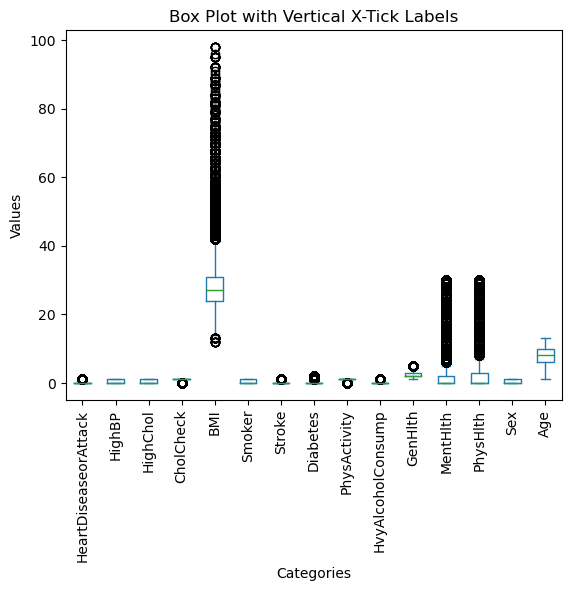

In [11]:
box_plot=df.plot.box()
box_plot.set_xticklabels(df.columns, rotation='vertical')
 
# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Box Plot with Vertical X-Tick Labels')
 
# Show the plot
plt.show()

*Here we plot the box plot for the data in the DataFrame 'df'. It first plots the box plot and then rotates the x-axis labels vertically for better readability. Then, it adds labels for the x and y axes and a title for the plot. Finally, it displays the plot.
In this we can see that there is outlier in 'BMI','Diabetes','MentlHlth','PhysHlth'. THese cloumns have more outlier as compare to other , so lets remove it one by one.*

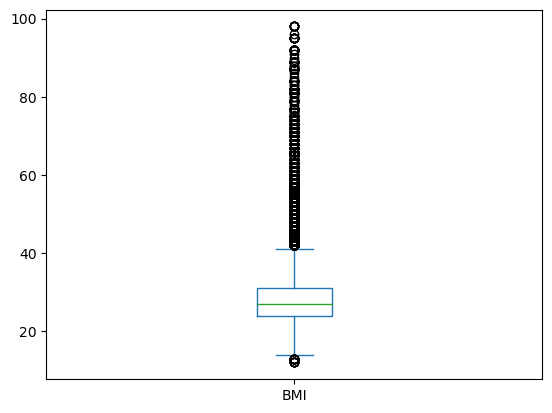

In [12]:
box_plot=df["BMI"].plot.box()

*Here we creates a box plot specifically for the "BMI" column in the DataFrame 'df'. It visualizes the distribution of BMI values using a box-and-whisker plot.*

In [13]:
from scipy.stats import zscore

*Here we imports the zscore function from the scipy.stats module. This function calculates the z-score for each value in a dataset, which is a measure of how many standard deviations a data point is from the mean of the dataset*

In [14]:
# Assuming 'df' is your DataFrame containing the data
# Calculate z-scores for the "BMI" column
z_scores = zscore(df['BMI'])

# Print Z-scores
print("Z-scores:")
print(z_scores)

# Set a threshold for outlier detection (e.g., 2 standard deviations)
threshold = 2 # Assuming 'df' is your DataFrame containing the data
# Calculate z-scores for the "BMI" column
z_scores = zscore(df['BMI'])

# Print Z-scores
print("Z-scores:")
print(z_scores)

# Set a threshold for outlier detection (e.g., 2 standard deviations)
threshold = 2

Z-scores:
0         1.757936
1        -0.511806
2        -0.057858
3        -0.209174
4        -0.663122
            ...   
253675    2.514516
253676   -1.571019
253677   -0.057858
253678   -0.814438
253679   -0.511806
Name: BMI, Length: 253680, dtype: float64
Z-scores:
0         1.757936
1        -0.511806
2        -0.057858
3        -0.209174
4        -0.663122
            ...   
253675    2.514516
253676   -1.571019
253677   -0.057858
253678   -0.814438
253679   -0.511806
Name: BMI, Length: 253680, dtype: float64


*Here calculates the z-scores for the "BMI" column in the DataFrame 'df' using the zscore function imported from scipy.stats. It then sets a threshold for outlier detection, typically 2 standard deviations from the mean. The calculated z-scores are printed out. These z-scores can be used to identify and potentially remove outliers from the dataset.*

In [15]:
# Identify outliers based on the threshold
outliers = df[abs(z_scores) > threshold]

# Print outliers
print("Outliers in BMI column:")
print(outliers)

Outliers in BMI column:
        HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
85                       0.0     1.0       1.0        1.0  45.0     0.0   
97                       0.0     1.0       0.0        1.0  45.0     0.0   
156                      0.0     1.0       1.0        1.0  47.0     1.0   
188                      0.0     1.0       0.0        1.0  43.0     1.0   
201                      0.0     1.0       1.0        1.0  55.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253547                   0.0     1.0       1.0        1.0  44.0     0.0   
253557                   0.0     1.0       1.0        1.0  42.0     0.0   
253567                   1.0     1.0       1.0        1.0  44.0     0.0   
253673                   0.0     1.0       0.0        1.0  42.0     0.0   
253675                   0.0     1.0       1.0        1.0  45.0     0.0   

        Stroke  Diabetes  PhysActivity  HvyAlcoholConsump  GenHlth  MentHlt

*Here we identifies outliers in the "BMI" column of the DataFrame 'df' based on the threshold set earlier. It selects rows where the absolute z-score of the "BMI" column exceeds the threshold value. These rows are considered outliers and are stored in the 'outliers' variable. Finally, it prints out the identified outliers in the "BMI" column.*

In [16]:
# Remove outliers from the DataFrame
df = df[abs(z_scores) <= threshold]

*Here we removes outliers from the DataFrame 'df'. It filters the DataFrame to keep only the rows where the absolute z-score of the "BMI" column is less than or equal to the threshold value. This effectively removes outliers from the dataset.*

In [17]:
# Print DataFrame shape before and after removing outliers
print("DataFrame shape before removing outliers:", df.shape)
print("DataFrame shape after removing outliers:", df.shape)

DataFrame shape before removing outliers: (243660, 15)
DataFrame shape after removing outliers: (243660, 15)


*DataFrame shape before removing outliers: (243660, 15)
DataFrame shape after removing outliers: (243660, 15)
*Here we does the following:

Prints the shape of the DataFrame 'df' before removing outliers.
Prints the shape of the DataFrame 'df' after removing outliers.
In essence, it provides a before-and-after comparison of the DataFrame shape to demonstrate the effect of outlier removal on the dataset size*

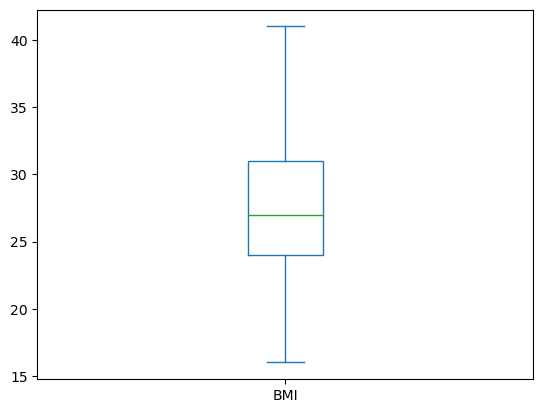

In [18]:
box_plot=df["BMI"].plot.box()

*Here we creates a box plot specifically for the "BMI" column in the DataFrame 'df'. It visualizes the distribution of BMI values after removing outlier using a box-and-whisker plot.*

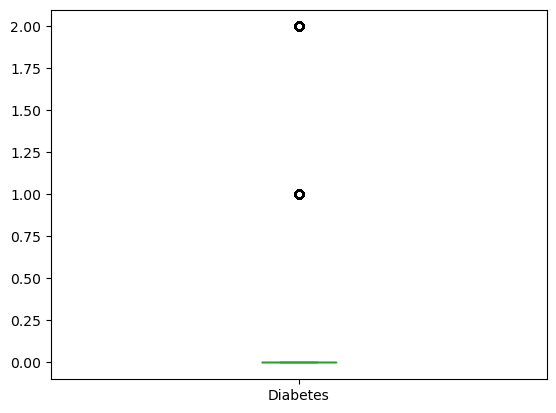

In [19]:
box_plot=df["Diabetes"].plot.box()

*Here we creates a box plot specifically for the "Diabetes" column in the DataFrame 'df'. It visualizes the distribution of Diabetes values using a box-and-whisker plot.*

In [20]:
# Assuming 'df' is your DataFrame containing the data
# Calculate z-scores for the "Diabetes" column
z_scores = zscore(df['Diabetes'])

# Print Z-scores
print("Z-scores:")
print(z_scores)

# Set a threshold for outlier detection (e.g., 2 standard deviations)
threshold = 2# Assuming 'df' is your DataFrame containing the data
# Calculate z-scores for the "Diabetes" column
z_scores = zscore(df['Diabetes'])

# Print Z-scores
print("Z-scores:")
print(z_scores)

# Set a threshold for outlier detection (e.g., 2 standard deviations)
threshold = 2

Z-scores:
0        -0.411283
1        -0.411283
2        -0.411283
3        -0.411283
4        -0.411283
            ...   
253674   -0.411283
253676    2.524723
253677   -0.411283
253678   -0.411283
253679    2.524723
Name: Diabetes, Length: 243660, dtype: float64
Z-scores:
0        -0.411283
1        -0.411283
2        -0.411283
3        -0.411283
4        -0.411283
            ...   
253674   -0.411283
253676    2.524723
253677   -0.411283
253678   -0.411283
253679    2.524723
Name: Diabetes, Length: 243660, dtype: float64


*Here calculates the z-scores for the "Diabetes" column in the DataFrame 'df' using the zscore function imported from scipy.stats. It then sets a threshold for outlier detection, typically 2 standard deviations from the mean. The calculated z-scores are printed out. These z-scores can be used to identify and potentially remove outliers from the dataset.*

In [21]:
# Identify outliers based on the threshold
outliers = df[abs(z_scores) > threshold]

# Print outliers
print("Outliers in Diabetes column:")
print(outliers)

Outliers in Diabetes column:
        HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
8                        1.0     1.0       1.0        1.0  30.0     1.0   
10                       0.0     0.0       0.0        1.0  25.0     1.0   
13                       0.0     1.0       1.0        1.0  28.0     0.0   
17                       0.0     0.0       0.0        1.0  23.0     1.0   
23                       0.0     1.0       0.0        1.0  27.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253659                   0.0     0.0       1.0        1.0  37.0     0.0   
253668                   1.0     0.0       1.0        1.0  29.0     1.0   
253670                   1.0     1.0       1.0        1.0  25.0     0.0   
253676                   0.0     1.0       1.0        1.0  18.0     0.0   
253679                   1.0     1.0       1.0        1.0  25.0     0.0   

        Stroke  Diabetes  PhysActivity  HvyAlcoholConsump  GenHlth  Me

*Here we identifies outliers in the "Diabetes" column of the DataFrame 'df' based on the threshold set earlier. It selects rows where the absolute z-score of the "Diabetes" column exceeds the threshold value. These rows are considered outliers and are stored in the 'outliers' variable. Finally, it prints out the identified outliers in the "Diabetes" column.*

In [22]:
# Remove outliers from the DataFrame
df = df[abs(z_scores) <= threshold]


*Here we removes outliers from the DataFrame 'df'. It filters the DataFrame to keep only the rows where the absolute z-score of the "Diabetes" column is less than or equal to the threshold value. This effectively removes outliers from the dataset.*

In [23]:
# Print DataFrame shape before and after removing outliers
print("DataFrame shape before removing outliers:", df.shape)
print("DataFrame shape after removing outliers:", df.shape)


DataFrame shape before removing outliers: (211697, 15)
DataFrame shape after removing outliers: (211697, 15)


*Here we does the following:
Prints the shape of the DataFrame 'df' before removing outliers. Prints the shape of the DataFrame 'df' after removing outliers. In essence, it provides a before-and-after comparison of the DataFrame shape to demonstrate the effect of outlier removal on the dataset size.*

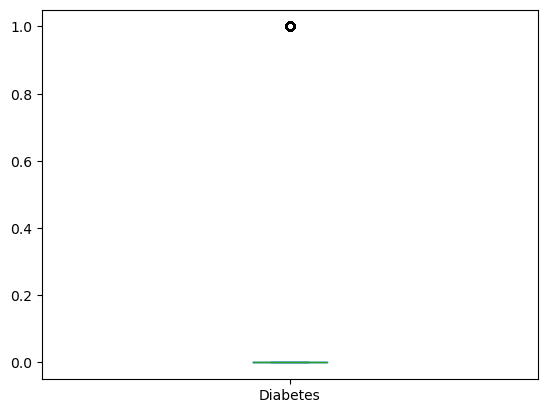

In [24]:
box_plot=df["Diabetes"].plot.box()

*Here we creates a box plot specifically for the "Diabetes" column in the DataFrame 'df'. It visualizes the distribution of Diabetes values after removing outlier using a box-and-whisker plot.*

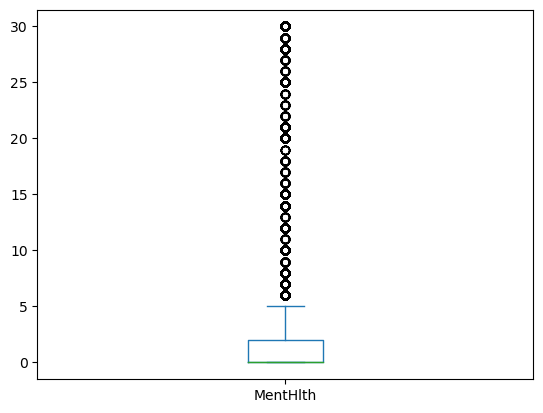

In [25]:
box_plot=df["MentHlth"].plot.box()

*Here we creates a box plot specifically for the "MentHlth" column in the DataFrame 'df'. It visualizes the distribution of MentHlth values using a box-and-whisker plot.*

In [26]:
# Assuming 'df' is your DataFrame containing the data
# Calculate z-scores for the "MentHlth" column
z_scores = zscore(df['MentHlth'])

# Print Z-scores
print("Z-scores:")
print(z_scores)

# Set a threshold for outlier detection (e.g., 2 standard deviations)
threshold = 2# Assuming 'df' is your DataFrame containing the data
# Calculate z-scores for the "MentHlth" column
z_scores = zscore(df['MentHlth'])

# Print Z-scores
print("Z-scores:")
print(z_scores)

# Set a threshold for outlier detection (e.g., 2 standard deviations)
threshold = 2

Z-scores:
0         2.153270
1        -0.413523
2         3.864466
3        -0.413523
4         0.014276
            ...   
253671   -0.413523
253672   -0.413523
253674   -0.413523
253677   -0.413523
253678   -0.413523
Name: MentHlth, Length: 211697, dtype: float64
Z-scores:
0         2.153270
1        -0.413523
2         3.864466
3        -0.413523
4         0.014276
            ...   
253671   -0.413523
253672   -0.413523
253674   -0.413523
253677   -0.413523
253678   -0.413523
Name: MentHlth, Length: 211697, dtype: float64


*Here calculates the z-scores for the "MentHlth" column in the DataFrame 'df' using the zscore function imported from scipy.stats. It then sets a threshold for outlier detection, typically 2 standard deviations from the mean. The calculated z-scores are printed out. These z-scores can be used to identify and potentially remove outliers from the dataset.*

In [27]:
# Identify outliers based on the threshold
outliers = df[abs(z_scores) > threshold]

# Print outliers
print("Outliers in MentHlth column:")
print(outliers)

Outliers in MentHlth column:
        HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                        0.0     1.0       1.0        1.0  40.0     1.0   
2                        0.0     1.0       1.0        1.0  28.0     0.0   
14                       0.0     0.0       1.0        1.0  33.0     1.0   
20                       1.0     1.0       1.0        1.0  22.0     0.0   
43                       0.0     1.0       0.0        1.0  23.0     1.0   
...                      ...     ...       ...        ...   ...     ...   
253611                   0.0     0.0       0.0        1.0  23.0     0.0   
253635                   0.0     1.0       1.0        1.0  27.0     0.0   
253640                   0.0     0.0       0.0        1.0  30.0     0.0   
253649                   0.0     0.0       1.0        1.0  27.0     0.0   
253665                   0.0     0.0       1.0        1.0  17.0     0.0   

        Stroke  Diabetes  PhysActivity  HvyAlcoholConsump  GenHlth  Me

*Here we identifies outliers in the "MentHlth" column of the DataFrame 'df' based on the threshold set earlier. It selects rows where the absolute z-score of the "MentHlth" column exceeds the threshold value. These rows are considered outliers and are stored in the 'outliers' variable. Finally, it prints out the identified outliers in the "MentHlth" column.*

In [28]:
# Remove outliers from the DataFrame
df = df[abs(z_scores) <= threshold]


*Here we removes outliers from the DataFrame 'df'. It filters the DataFrame to keep only the rows where the absolute z-score of the "MentHlth" column is less than or equal to the threshold value. This effectively removes outliers from the dataset.*

In [29]:
# Print DataFrame shape before and after removing outliers
print("DataFrame shape before removing outliers:", df.shape)
print("DataFrame shape after removing outliers:", df.shape)


DataFrame shape before removing outliers: (198721, 15)
DataFrame shape after removing outliers: (198721, 15)


*Here we does the following:

Prints the shape of the DataFrame 'df' before removing outliers. Prints the shape of the DataFrame 'df' after removing outliers. In essence, it provides a before-and-after comparison of the DataFrame shape to demonstrate the effect of outlier removal on the dataset size.*

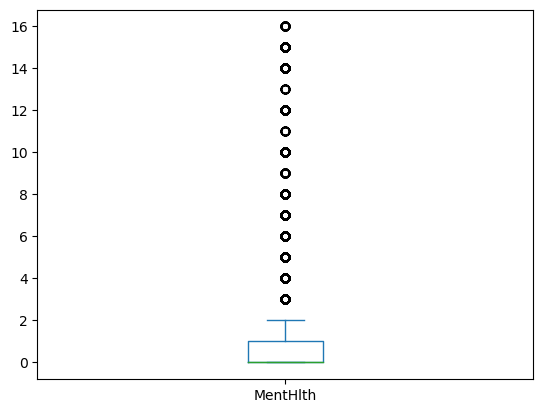

In [30]:
box_plot=df["MentHlth"].plot.box()

*Here we creates a box plot specifically for the "MentHlth" column in the DataFrame 'df'. It visualizes the distribution of MentHlth values after removing outlier using a box-and-whisker plot.*

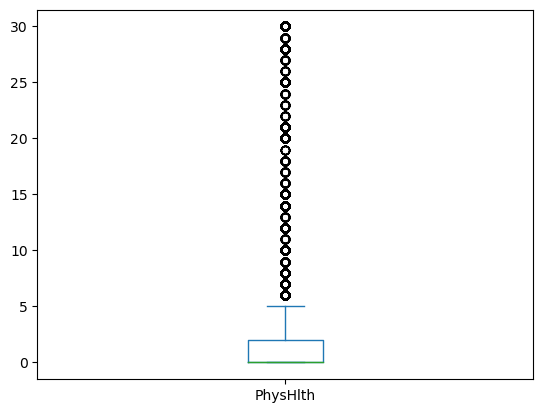

In [31]:
box_plot=df["PhysHlth"].plot.box()

*Here we creates a box plot specifically for the "PhysHlth" column in the DataFrame 'df'. It visualizes the distribution of PhysHlth values using a box-and-whisker plot.*

In [32]:
# Assuming 'df' is your DataFrame containing the data
# Calculate z-scores for the "PhysHlth" column
z_scores = zscore(df['PhysHlth'])

# Print Z-scores
print("Z-scores:")
print(z_scores)

# Set a threshold for outlier detection (e.g., 2 standard deviations)
threshold = 2# Assuming 'df' is your DataFrame containing the data
# Calculate z-scores for the "PhysHlth" column
z_scores = zscore(df['PhysHlth'])

# Print Z-scores
print("Z-scores:")
print(z_scores)

# Set a threshold for outlier detection (e.g., 2 standard deviations)
threshold = 2

Z-scores:
1        -0.412638
3        -0.412638
4        -0.412638
5        -0.133095
6         1.544161
            ...   
253671    0.286219
253672   -0.412638
253674   -0.412638
253677   -0.412638
253678   -0.412638
Name: PhysHlth, Length: 198721, dtype: float64
Z-scores:
1        -0.412638
3        -0.412638
4        -0.412638
5        -0.133095
6         1.544161
            ...   
253671    0.286219
253672   -0.412638
253674   -0.412638
253677   -0.412638
253678   -0.412638
Name: PhysHlth, Length: 198721, dtype: float64


*Here calculates the z-scores for the "PhysHlth" column in the DataFrame 'df' using the zscore function imported from scipy.stats. It then sets a threshold for outlier detection, typically 2 standard deviations from the mean. The calculated z-scores are printed out. These z-scores can be used to identify and potentially remove outliers from the dataset.*

In [33]:
# Identify outliers based on the threshold
outliers = df[abs(z_scores) > threshold]

# Print outliers
print("Outliers in PhysHlth column:")
print(outliers)

Outliers in PhysHlth column:
        HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
11                       0.0     1.0       1.0        1.0  34.0     1.0   
21                       0.0     1.0       1.0        1.0  38.0     1.0   
39                       0.0     1.0       1.0        1.0  24.0     1.0   
42                       0.0     0.0       0.0        1.0  28.0     1.0   
105                      0.0     1.0       0.0        1.0  30.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253606                   0.0     1.0       1.0        1.0  23.0     1.0   
253608                   0.0     0.0       0.0        1.0  29.0     0.0   
253620                   0.0     1.0       0.0        1.0  23.0     1.0   
253626                   0.0     0.0       0.0        1.0  29.0     0.0   
253663                   0.0     0.0       0.0        1.0  23.0     0.0   

        Stroke  Diabetes  PhysActivity  HvyAlcoholConsump  GenHlth  Me

*Here we identifies outliers in the "PhysHlth" column of the DataFrame 'df' based on the threshold set earlier. It selects rows where the absolute z-score of the "PhysHlth" column exceeds the threshold value. These rows are considered outliers and are stored in the 'outliers' variable. Finally, it prints out the identified outliers in the "PhysHlth" column.*

In [34]:
# Remove outliers from the DataFrame
df = df[abs(z_scores) <= threshold]


*Here we removes outliers from the DataFrame 'df'. It filters the DataFrame to keep only the rows where the absolute z-score of the "PhysHlth" column is less than or equal to the threshold value. This effectively removes outliers from the dataset.*

In [35]:
# Print DataFrame shape before and after removing outliers
print("DataFrame shape before removing outliers:", df.shape)
print("DataFrame shape after removing outliers:", df.shape)


DataFrame shape before removing outliers: (186261, 15)
DataFrame shape after removing outliers: (186261, 15)


*Here we does the following:

Prints the shape of the DataFrame 'df' before removing outliers. Prints the shape of the DataFrame 'df' after removing outliers. In essence, it provides a before-and-after comparison of the DataFrame shape to demonstrate the effect of outlier removal on the dataset size.*

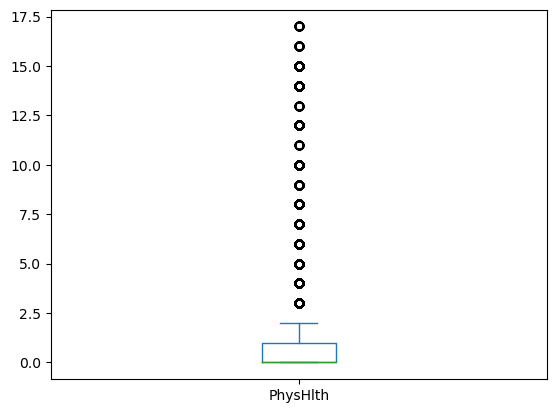

In [36]:
box_plot=df["PhysHlth"].plot.box()

*Here we creates a box plot specifically for the "PhysHlth" column in the DataFrame 'df'. It visualizes the distribution of PhyHlth values after removing outlier using a box-and-whisker plot.*

In [37]:
df["HeartDiseaseorAttack"].unique()

array([0., 1.])

*There are two unique values 0.0 and 0.1 in "HeartDiseaseorAttack" column.* 

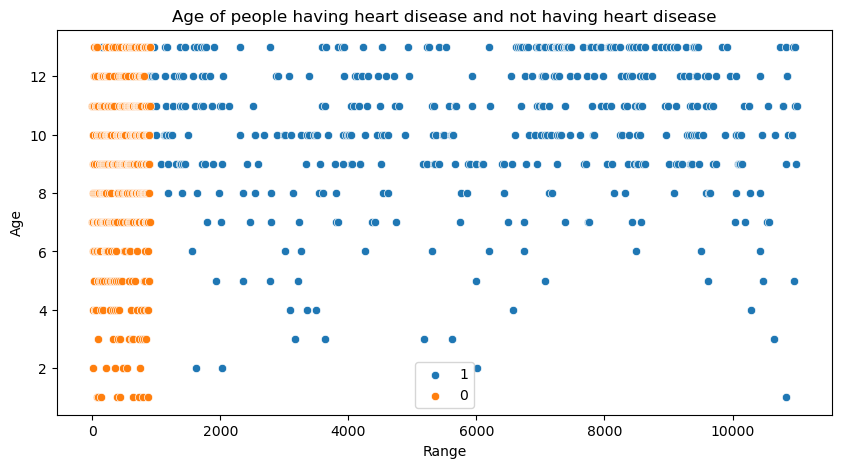

In [38]:
plt.figure(figsize=(10,5))
df0=df[df['HeartDiseaseorAttack']==0]
df1=df[df['HeartDiseaseorAttack']==1]
sns.scatterplot(df1['Age'].head(500),label="1")
sns.scatterplot(df0['Age'].head(500),label="0")
plt.title("Age of people having heart disease and not having heart disease")
plt.ylabel("Age")
plt.xlabel("Range")
plt.legend()
plt.show()

*Here we create a scatter plot comparing the ages of people with and without heart disease. It selects a subset of data for each group (df1 for individuals with heart disease and df0 for individuals without heart disease), plots their ages and lebels them accordingly. The plot is then displayed with labels and title*

1.0    7044
0.0    4514
Name: Sex, dtype: int64


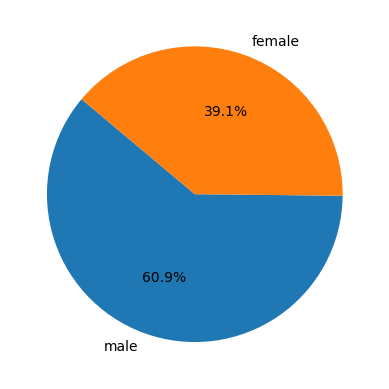

In [39]:
print(df1['Sex'].value_counts())
l=list((df1['Sex'].value_counts()))
l
plt.pie(l,labels=['male','female'],autopct='%1.1f%%', startangle=140)
plt.show()

*Here we counts the count of males and females with heart disease(df1) then create a pie chart to visualize the distribution of genders among individuals with heart disease*

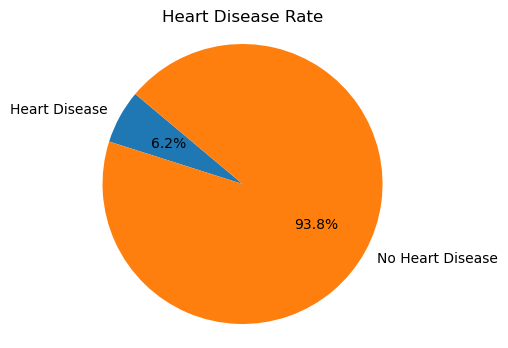

In [40]:
hd = (df["HeartDiseaseorAttack"]== 1).sum()
nohd = (df["HeartDiseaseorAttack"]==0).sum()

sizes = [hd,nohd]
labels = ['Heart Disease','No Heart Disease']

plt.figure(figsize=(6,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Heart Disease Rate')

plt.axis('equal')
plt.show()

*Here we calculate the count of individauls with heart disease and without heart disease in the dataframe . Then we creates a pie chart to display the distribution of heart disease status among the dataset, with percentage labeled on each slice.*

In [41]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'Age'],
      dtype='object')

*Here are the different columns in our dataframe*

Lets split the data into train and test.

In [42]:
y=df[["HeartDiseaseorAttack"]]
x=df.drop("HeartDiseaseorAttack",axis=1)


*Here we separates the target variable "HeartDiseaseorAttack" into a separate dataframe 'y' and the remaining features into another dataframe 'x'. This sepration is typically done to prepare the data for machine learning modeling , where 'x' represents the features used for prediction , and 'y' represents the target variable to be predicted*

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

*Here we split the dataset into training and testing sets fro both features (x) and the target variable (y). This is done to asses the performance of machine learning models. The training set(x_test,y_test) is used to evaluate its performance. The "test_size" parameter specifies the proportion of the dataset to include in the testing set, and "random_state" ensures reproducilility by fixing the random seed for the split.*

In [44]:
print(x_train.shape)
print(y_train.shape)

(149008, 14)
(149008, 1)


*Here we prints the shapes(diamensions) of the training sets for features(x_train). This helps to confirm the size of the training data fitting a machine learning model.*

## Model 1 : Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

*Here we import the LogisticRegression from the scikit-learn library for logistic regression modeling. Additionally , we imported confusion_matrix from sklearn.metrics to evaluate the performance of our model by comparing labels with true labels.*

In [46]:
model=LogisticRegression()

*Here we instantiated a logistic regression model object named "model" using the default parameters provided by scikit-learns's LogisticRegression() function.*

In [47]:
model.fit(x_train,y_train)

LogisticRegression()

*Here we trained the logistic regression model using the training data , using the fit() method.*

In [48]:
print(model.score(x_test,y_test))

0.9368641451695165


*Here we printed the accuracy score of the logistic regression model on the test data using the score() method.*

In [49]:
pred=model.predict(x_test)

*Here we generated predictions on the tset data using the trained logistic regression model and stored the results in the variable "pred".*

In [50]:
confusion_matrix(y_test,pred)

array([[34802,   131],
       [ 2221,    99]], dtype=int64)

*Here we gerated a confusion matrix to evaluate the performance of the logistic regression model by comparing the predicted labels ("pred") against the true lebels ("y_test"). This matrix provides insight into the model's classification accuracy and errors.*

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     34933
         1.0       0.43      0.04      0.08      2320

    accuracy                           0.94     37253
   macro avg       0.69      0.52      0.52     37253
weighted avg       0.91      0.94      0.91     37253



*Here we printed a classification report that includes precision, recall, F1-score and support for each class based on the predictions ("pred") compared to the true labels ("y_test"). This provides a detailed evaluation of the model's performance on the test data.*

# Model 2 : Decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)
print(model1.score(x_test,y_test))
pred1 = model1.predict(x_test)

0.9135371647920972


Here we imported DecisionTreeClassifier from scikit-learn , created a Decision tree model named "model1" , trained it on the training data (x_train and y_train), printed its accuracy score on the test data(x_test,y_test) and predictions on the test data using the trained model, storing the results in "pred1"

In [53]:
confusion_matrix(y_test,pred1)

array([[33710,  1223],
       [ 1998,   322]], dtype=int64)

We generated a confision matrix to assess the performance of the Decision tree Classifier model ("model1") by comparing the predicted labels ("pred1") aganist the true labels ("y_test"). This matrix provides insights into the model's classification accuracy and errors.

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     34933
         1.0       0.21      0.14      0.17      2320

    accuracy                           0.91     37253
   macro avg       0.58      0.55      0.56     37253
weighted avg       0.90      0.91      0.91     37253



Here we printed a classification report that includes precision, recall, F1-score and support for each class based on the predictions ("pred1") compared to the true labels ("y_test"). This provides a detailed evaluation of the model's performance on the test data

# Model 3 : Random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train,y_train)
print(model2.score(x_test,y_test))
pred2=model2.predict(x_test)

0.9296969371594234


*Here we imported RandomForestClassifier from scikit-learn , created a rendom forest model named "model2" , trained it on the training data (x_train and y_train), printed its accuracy score on the test data(x_test,y_test) and predictions on the test data using the trained model, storing the results in "pred2".*

In [56]:
confusion_matrix(y_test,pred2)

array([[34422,   511],
       [ 2108,   212]], dtype=int64)

*We generated a confision matrix to assess the performance of the Random Forest Classifier model ("model2") by comparing the predicted labels ("pred2") aganist the true labels ("y_test"). This matrix provides insights into the model's classification accuracy and errors.*

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     34933
         1.0       0.29      0.09      0.14      2320

    accuracy                           0.93     37253
   macro avg       0.62      0.54      0.55     37253
weighted avg       0.90      0.93      0.91     37253



*Here we printed a classification report that includes precision, recall, F1-score and support for each class based on the predictions ("pred2") compared to the true labels ("y_test"). This provides a detailed evaluation of the model's performance on the test data.*

# Model 4 : KNeighborsClassifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier()
model3.fit(x_train,y_train)
model3.score(x_test,y_test)
print(model3.score(x_test,y_test))
pred3=model3.predict(x_test)

0.9321396934475076


*Here we imported KNeighboursClassifiers from scikit-learn , created a k-nearest neighbour (KNN) model named "model3", trianed it on the training data(x_train and y_train), printed its accuracy score on the test data(x_test and y_test), made predictions on the test data using the trained model, and stored the results in "pred3".*

In [59]:
confusion_matrix(y_test,pred3)

array([[34563,   370],
       [ 2158,   162]], dtype=int64)

*Here we genrated a confusion matrix to evaluate the peformance of the K-Nearest Neighbors(KNN) classifier model("model3")  by comparing the predicted labels("pred3") against the true labels ("y_test"). This matrix provides insights into the model's classification accuracy and errors.*

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     34933
         1.0       0.30      0.07      0.11      2320

    accuracy                           0.93     37253
   macro avg       0.62      0.53      0.54     37253
weighted avg       0.90      0.93      0.91     37253



*Here we printed a classification report that includes precision, recall, F1-score and support for each class based on the predictions ("pred3") compared to the true labels ("y_test"). This provides a detailed evaluation of the model's performance on the test data.*

*Conclusion : 
          From above models LogisticRegression gives 0.94 accuracy, DecisionTreeClassifier gives 0.91 accuracy, RandomForestClassifier gives 0.93 accuracy and KNeighborsClassifier gives 0.93 accury.
From all of these models LogisticRegression gives highest accuracy.*